# Liver Disease Prediction
In this machine learning project, we will predict whether a person is suffering from Liver Disease or not.

### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Loading the Data set

In [2]:
df = pd.read_csv("indian_liver_patient.csv")
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
# Lets see the shape of the dataset

df.shape

(583, 11)

### Exploratory Data Analysis (EDA)

In [4]:
# Lets see some informations about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
# Lets see the description of the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
Total_Bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
Direct_Bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
Alkaline_Phosphotase,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
Alamine_Aminotransferase,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
Aspartate_Aminotransferase,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
Total_Protiens,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
Albumin,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
Albumin_and_Globulin_Ratio,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8
Dataset,583.0,1.286449,0.452490,1.0,1.0,1.00,2.0,2.0


In [6]:
# Lets check for null values

df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

We can see 4 null values in the feature Albumin_and_Globulin_Ratio

The number of patients diagnosed with liver disease: 416
The number of patients not diagnosed with liver disease: 167


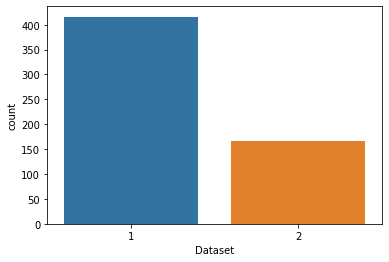

In [8]:
# Countplot to see the number of unique values in the target column("Dataset")

sns.countplot(data = df, x = "Dataset", label = "Count")
LD, NLD = df["Dataset"].value_counts()
print("The number of patients diagnosed with liver disease: {}".format(LD))
print("The number of patients not diagnosed with liver disease: {}".format(NLD))

We can see that the target ("Dataset") column is balanced.

C:\Users\SWARNAVA\anaconda3\envs\health\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


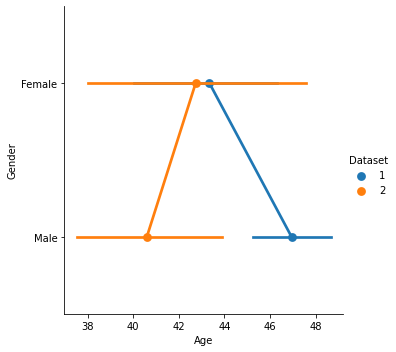

In [9]:
# Factor plot

sns.factorplot(x="Age", y="Gender", hue="Dataset", data=df)

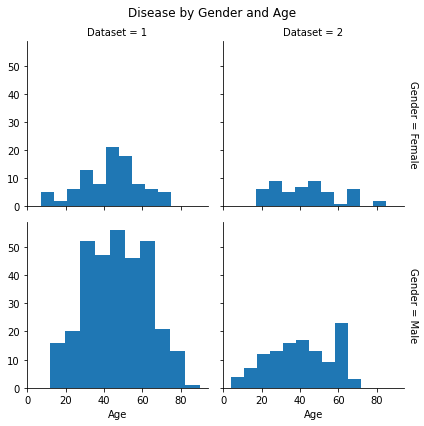

In [10]:
# Histogram

g = sns.FacetGrid(df, col="Dataset", row="Gender", margin_titles=True)
g.map(plt.hist, "Age")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age');

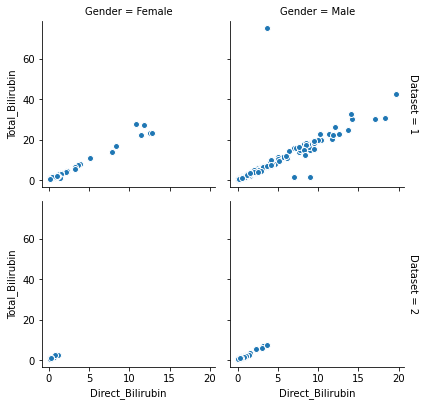

In [11]:
# Scatterplot

g = sns.FacetGrid(df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Direct_Bilirubin", "Total_Bilirubin", edgecolor="w")
plt.subplots_adjust(top=0.9)

In [13]:
# Independent and Dependent feature for basic data analysis

x = df.drop(['Gender','Dataset'], axis=1)
Y = df['Dataset'] # 1 for liver disease; 2 for no liver disease

In [17]:
# Correlation between all the features including target

df.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,-0.137351
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,-0.220208
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,-0.246046
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,-0.184866
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,-0.163416
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,-0.151934
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,0.035008
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,0.161388
Albumin_and_Globulin_Ratio,-0.216089,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,0.162319
Dataset,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,0.162319,1.000000


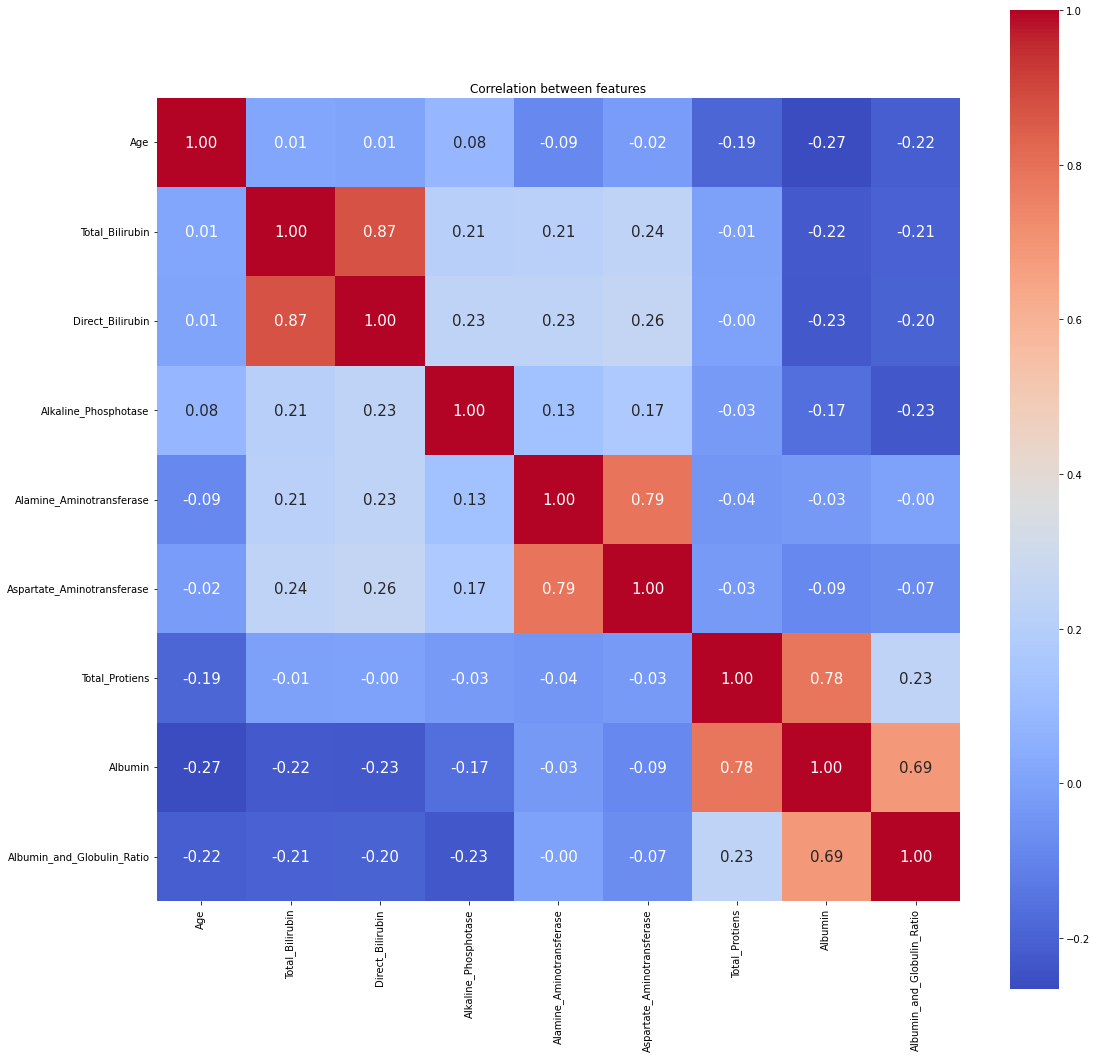

In [14]:
# Heatmap showing the correlation between the independent features

liver_corr = x.corr()
plt.figure(figsize=(18,18))
sns.heatmap(liver_corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title('Correlation between features');

C:\Users\SWARNAVA\anaconda3\envs\health\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


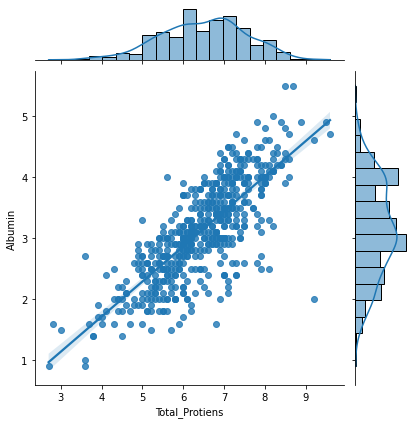

In [18]:
# Jointplot

sns.jointplot("Total_Protiens", "Albumin", data=df, kind="reg")

### Feature Engineering

In [12]:
# Handling the missing values of the feature Albumin_and_Globulin_Ratio

df["Albumin_and_Globulin_Ratio"] = df.Albumin_and_Globulin_Ratio.fillna(df['Albumin_and_Globulin_Ratio'].mean())

In [20]:
# Label Encoding for the Gender feature

df['Gender'] = df['Gender'].apply(lambda x:1 if x == 'Male' else 0)

In [24]:
# Filling nan values(if any) with 0.94 (from domain knowledge)

df = df.fillna(0.94)

In [26]:
# Independent and Dependent features for Model Building

X=df[['Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']]
y=df['Dataset']

In [27]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [28]:
# Lets see the shape of the train and test datasets

print('Shape training set: X:{}, y:{}'.format(X_train.shape, y_train.shape))
print('Shape test set: X:{}, y:{}'.format(X_test.shape, y_test.shape))

Shape training set: X:(408, 7), y:(408,)
Shape test set: X:(175, 7), y:(175,)


### Model Building

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
# Initializing the model

rf = RandomForestClassifier()

In [31]:
# Model Fitting

rf.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
# Prediction

pred = rf.predict(X_test)

In [33]:
# Validation

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(pred, y_test))
print(confusion_matrix(pred, y_test))
print(classification_report(pred, y_test))

0.7085714285714285
[[112  37]
 [ 14  12]]
              precision    recall  f1-score   support

           1       0.89      0.75      0.81       149
           2       0.24      0.46      0.32        26

    accuracy                           0.71       175
   macro avg       0.57      0.61      0.57       175
weighted avg       0.79      0.71      0.74       175



### Hyperparameter Optimization

In [34]:
from sklearn.model_selection import RandomizedSearchCV

In [35]:
# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=200,stop=2000,num=10)]

# Number of features to consider at every split
max_features=['auto','sqrt', 'log2']

# Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(10,1000,10)]

# Minimum number of samples required to split a node
min_samples_split=[2,5,10,14]

# Minimum number of samples required at each leaf node
min_samples_leaf=[1,2,4,6,8]

# Create the random grid
random_grid={'n_estimators':n_estimators,
            'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [37]:
# Fitting the model

rf = RandomForestClassifier()
rf_randomCV = RandomizedSearchCV(estimator=rf, param_distributions = random_grid, n_iter=25, cv=3, verbose=2, random_state=100, n_jobs=-1)

### fit the randomized model
rf_randomCV.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=25,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [38]:
# Getting the best parameters

rf_randomCV.best_params_

{'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': 'sqrt',
 'max_depth': 1000,
 'criterion': 'entropy'}

In [39]:
# Getting the best estimator

rf_randomCV.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=1000, max_features='sqrt',
                       min_samples_leaf=8, n_estimators=2000)

In [42]:
# Initializing the model with the best parameters

model = RandomForestClassifier(n_estimators = 2000, min_samples_split = 2, min_samples_leaf = 8, max_features = 'sqrt',
                               max_depth = 1000, criterion = 'entropy')


In [44]:
# Model Fitting with best parameters

model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=1000, max_features='sqrt',
                       min_samples_leaf=8, n_estimators=2000)

In [45]:
# Prediction

y_pred = model.predict(X_test)

In [46]:
# Validation

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

0.7314285714285714
[[118  39]
 [  8  10]]
              precision    recall  f1-score   support

           1       0.94      0.75      0.83       157
           2       0.20      0.56      0.30        18

    accuracy                           0.73       175
   macro avg       0.57      0.65      0.57       175
weighted avg       0.86      0.73      0.78       175



### Saving the model for future use

In [47]:
import joblib 
joblib.dump(model,r"C:\Users\SWARNAVA\Desktop\Healthcare\Kidney\liver_model.pkl")

['C:\\Users\\SWARNAVA\\Desktop\\Healthcare\\Kidney\\liver_model.pkl']